### University of Canberra
### Faculty of Science and Technology

<h1 style="text-align: center;">Pattern Recognition and Machine Learning ( Fashion MNIST )</h1>

### Assignment 1 Part B
### Group No 43
### Project Team Members
- Ajul Thomas u3253992
- Hamad Rasheed u3224704
  

# Introduction

In this project, we leverage the capabilities of Logistic Regression, a straightforward yet potent algorithm, to classify articles of clothing from grayscale images. Logistic Regression serves as our chosen machine learning model for this endeavor, offering a balance between computational efficiency and predictive accuracy.

Our primary objective is to implement a Logistic Regression algorithm to classify images from the FashionMNIST dataset. Unlike conventional security measures like Captcha, which aim to differentiate humans from automated bots, our research focuses on enabling a computer to accurately identify various types of clothing.

The research goal is to allow a computer to recognize and classify images of clothing items, such as shirts, trousers, sneakers, and more. We will be working with the FashionMNIST dataset, a modern alternative to the traditional MNIST dataset for handwritten digits. FashionMNIST comprises 70,000 grayscale images, each representing a specific type of clothing. The images are diverse, and the task of classifying them accurately presents a unique challenge.

Given that the human benchmark for classifying FashionMNIST is not as well-established as it is for MNIST, our aim is to exceed any existing benchmarks and set new standards for machine classification of fashion items using Logistic Regression.


#### 1. Problem Statement and Research Questions

The primary problem we aim to solve is the automated classification of articles of clothing based on grayscale images. As fashion retail moves increasingly online, the ability to accurately categorize clothing items through machine learning algorithms can significantly enhance user experience and inventory management.

#### Questions we seek to answer from the dataset include:

- Can a machine learning model accurately classify different types of clothing based on grayscale images?

- What is the level of accuracy that can be achieved using Logistic Regression?

- How does the model's performance compare to human-level benchmarks, if available?

- Are there specific clothing categories that the model struggles to classify?

#### 2. Dataset Description

Context

The Fashion-MNIST dataset is a collection of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 different classes. The dataset is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms.

###### Content

- Each row: Represents a separate image.
- Column 1: Contains the class label, representing the article of clothing.
- Remaining Columns (784 in total): Contain pixel values indicating the darkness of the pixel, ranging from 1 to 255.
- To locate a pixel on the image, one can decompose x=i×28+j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.

##### Labels
The dataset includes the following labels:

0: T-shirt/top<br>
1: Trouser<br>
2: Pullover<br>
3: Dress<br>
4: Coat<br>
5: Sandal<br>
6: Shirt<br>
7: Sneaker<br>
8: Bag<br>
9: Ankle boot<br>


#### 3. Justification for Using Logistic Regression

Logistic Regression is particularly well-suited for this classification problem for several reasons:

- **Simplicity and Efficiency:** Logistic Regression is computationally less intensive compared to other algorithms like Neural Networks, making it quicker for prototyping and testing.

- **Interpretability:** The model provides insights into the importance of each feature (pixel), which can be valuable for understanding which parts of the image are crucial for classification.

- **Probabilistic Output:** Logistic Regression provides probabilities for each class, offering a nuanced view of the model's confidence in its predictions.

- **Benchmarking:** Given that Fashion-MNIST is intended as a drop-in replacement for the original MNIST, using Logistic Regression allows for a straightforward comparison of performance metrics between the two datasets.

By employing Logistic Regression, we aim to answer the research questions outlined above, providing a robust, interpretable, and efficient solution for clothing classification.

### Retrieving data 
The data for this project was sourced from the Fashion-MNIST dataset available on Kaggle, as specified in the research question. This dataset serves as a comprehensive collection of grayscale images of various clothing articles, ideal for our classification task using Logistic Regression.

##### Importing required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


##### Reading files

In [3]:
data_train = pd.read_csv("./train.csv")
data_test = pd.read_csv("./test.csv")
labels_df=pd.read_csv("./labels.csv")
# labels_df=labels_df.rename({"Label": "labels", "Descripion": "desc"}, axis=1)

##### Exploring Data

In [10]:
data_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [11]:
data_train.info

<bound method DataFrame.info of        label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       

In [16]:
data_train.isnull().sum().sum()

0

In [5]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
labels_df.head(10)

,labels,desc
0,0,T-shirt/top
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,Sneaker
8,8,Bag
9,9,Ankle boot


In [9]:
print(f'Shape of train data: {data_train.shape}')
print(f'Shape of test data: {data_test.shape}')

Shape of train data: (60000, 785)
Shape of test data: (10000, 785)


#### Show the image and data

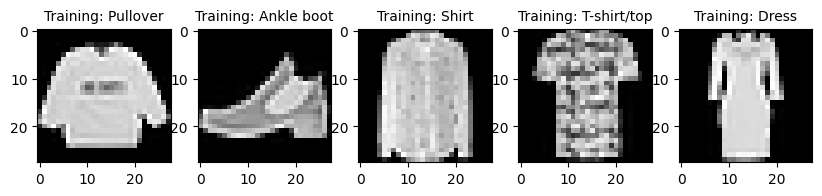

In [24]:
plt.figure(figsize=(10,2))
for index in range(5):
    image = data_train.iloc[index, 1:785]
    label = data_train.iloc[index, 0]
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.array(image).reshape(28, 28), cmap=plt.cm.gray)
    plt.title(f'Training: {labels_df.at[label, "desc"]}', fontsize = 10)

### Understanding the Data
The Fashion-MNIST dataset consists of 70,000 grayscale images, each of size 28x28 pixels, divided into a training set of 60,000 examples and a test set of 10,000 examples. Each image is represented as a row in the dataset, with the first column indicating the class label of the clothing article, ranging from 0 to 9 (e.g., 0 for T-shirt/top, 1 for Trouser, etc.). The remaining 784 columns correspond to the individual pixels of the 28x28 image. Each pixel value is an integer between 1 and 255, representing the darkness level of the pixel, with higher numbers indicating darker shades.

For instance, consider the below record from the data set.

In [34]:
pd.set_option('display.max_columns', None)
data_train.loc[[0]]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

reshaping the pixel values in the above row into a 28x28 matrix

In [40]:
np.array(data_train.iloc[0,1:]).reshape(28, 28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   4,   0,   0,   0,   0,   0,  62,  61,  21,
         29,  23,  51, 136,  61,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  88, 201, 228, 225, 255, 115,
         62, 137, 255, 235, 222, 255, 135,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  47, 252, 234, 238, 224, 215, 215, 229,
        108, 180, 207, 214, 224, 231, 249, 254,  45,   0,   0,   0,   0,
          0,   0],
       [  

The label associated with the above matrix is,

In [45]:
label_index = data_train.iloc[0,0]
labels_df.at[label_index, "desc"]

'Pullover'

plotting the above 28x28 pixels, 

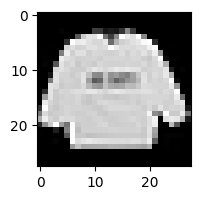

In [46]:
plt.figure(figsize=(10,2))
plt.imshow(np.array(data_train.iloc[0,1:]).reshape(28, 28), cmap=plt.cm.gray)

### Build a Logistic Model to Classify Fashion-MNIST Images

To classify articles of clothing from the Fashion-MNIST dataset, we first need to provide the Logistic Regression classifier with a training dataset. This dataset not only includes the grayscale images but also the labels indicating the type of clothing each image represents, such as "T-shirt/top," "Trouser," and so on.

The model learns to associate the grayscale pixel values of each image with its corresponding label, effectively building an in-memory representation that predicts the most likely clothing article based on the image's pixel values. This learning process involves optimizing the model's parameters to minimize a loss function, which measures the difference between the predicted labels and the actual labels in the training set.

Once the model has been trained on this dataset, we can evaluate its performance using a separate test set. This test set contains images that the model has not seen before, allowing us to assess how well the model generalizes to new data.

The final output of this process is a confusion matrix—a two-dimensional array that provides a detailed breakdown of the model's performance. Each row in the matrix corresponds to the actual class of clothing, while each column corresponds to the predicted class. The diagonal elements indicate correct classifications, and the off-diagonal elements show where the model has made errors. This confusion matrix serves as a valuable tool for understanding the model's strengths and weaknesses in classifying different articles of clothing from the Fashion-MNIST dataset.

#### Loading packages

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

#### Select Target Variable

In [57]:
y_train = data_train["label"]
print(y_train.shape)
print(f'The cloth with code {y_train[0]} is',labels_df.at[y_train.loc[0],"desc"])

(60000,)
The cloth with code 2 is Pullover


#### Prepare data

In [58]:
X_train = data_train.iloc[:,1:]
X_train.shape

(60000, 784)

#### Split data into training and validation set

In [63]:
pd.reset_option("display.max_columns")

y_test = data_test["label"]
X_test = data_test.iloc[:,1:]

print(y_test.head())
print(X_train.head())

0    0
1    1
2    2
3    2
4    3
Name: label, dtype: int64
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       5       0   
3       0       0       0       1       2       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0        30        43         0   
3        0  ...         3         0         0         0         0         1   
4        0  ...         0         0         0         0         0         0   

 

#### Select a linear regression classifier

#### Fit the data

#### Prediction of the unseen data

### Analysis of results - classification report

#### Create confusion matrix

#### Visualise correct prediction

#### Visualise misclassified images

#### Visualise corrected images